# Predicting a Pulsar Star

For this project we'll analyze **Predicting a Pulsar Star** dataset from [Kaggle](https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star). The data contains the following fields:

- Mean of the integrated profile
- Standard deviation of the integrated profile
- Excess kurtosis of the integrated profile
- Skewness of the integrated profile
- Mean of the DM-SNR curve
- Standard deviation of the DM-SNR curve
- Excess kurtosis of the DM-SNR curve
- Skewness of the DM-SNR curve
- target class, 0 (negative) and 1 (positive)

### Import libraries:

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Reading files:

In [3]:
stars = pd.read_csv("pulsar_stars.csv")

stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


### EDA

N:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
N:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 864x576 with 0 Axes>

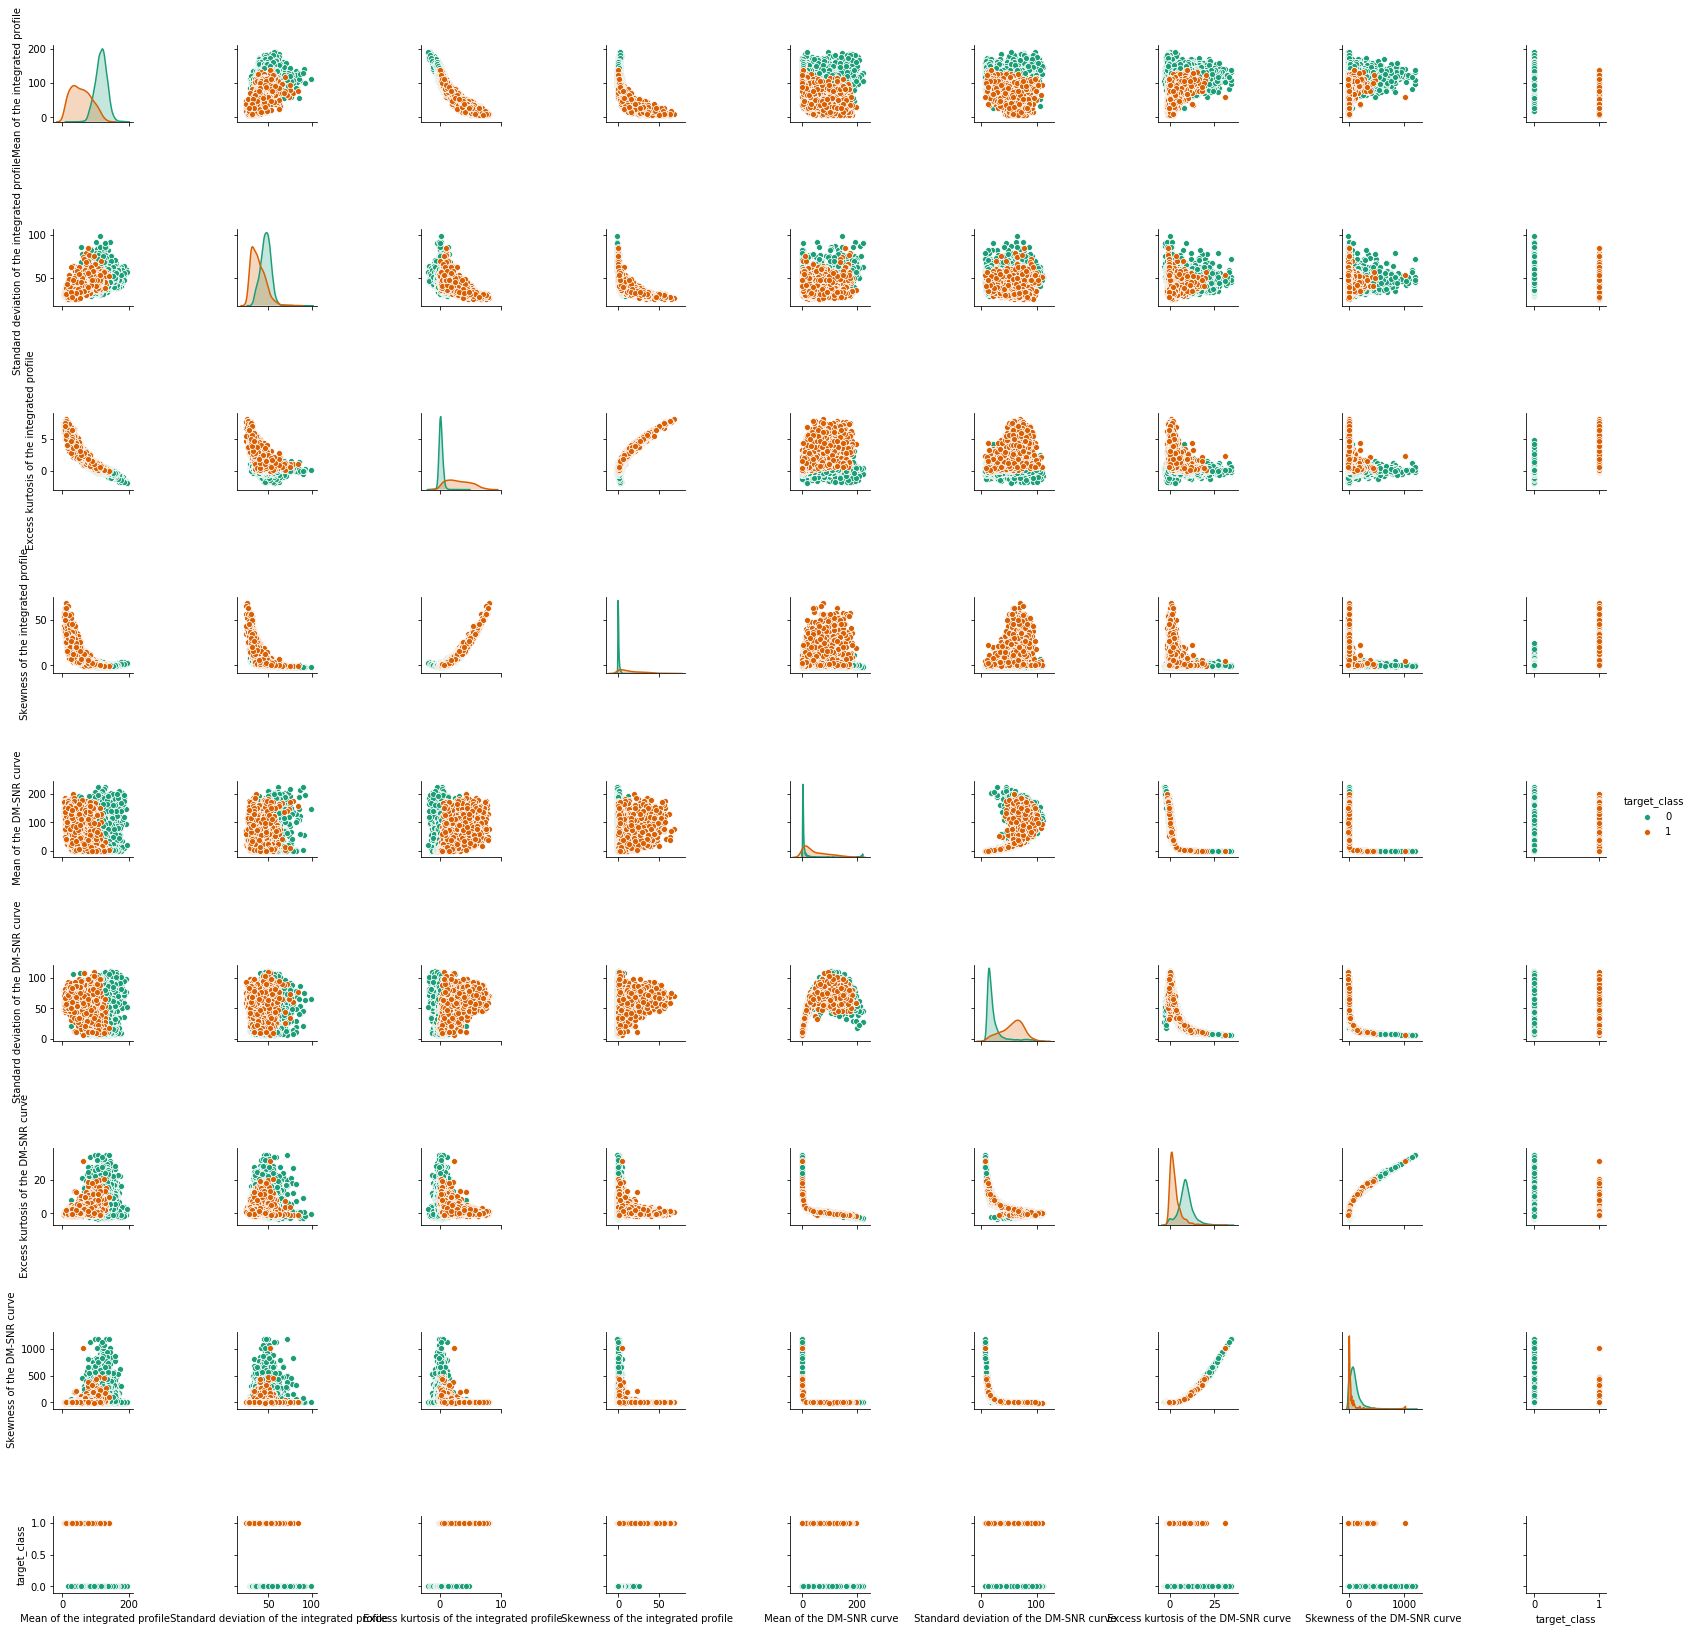

In [9]:
plt.figure(figsize = (12, 8))
sns.pairplot(stars,hue='target_class',palette='Dark2')

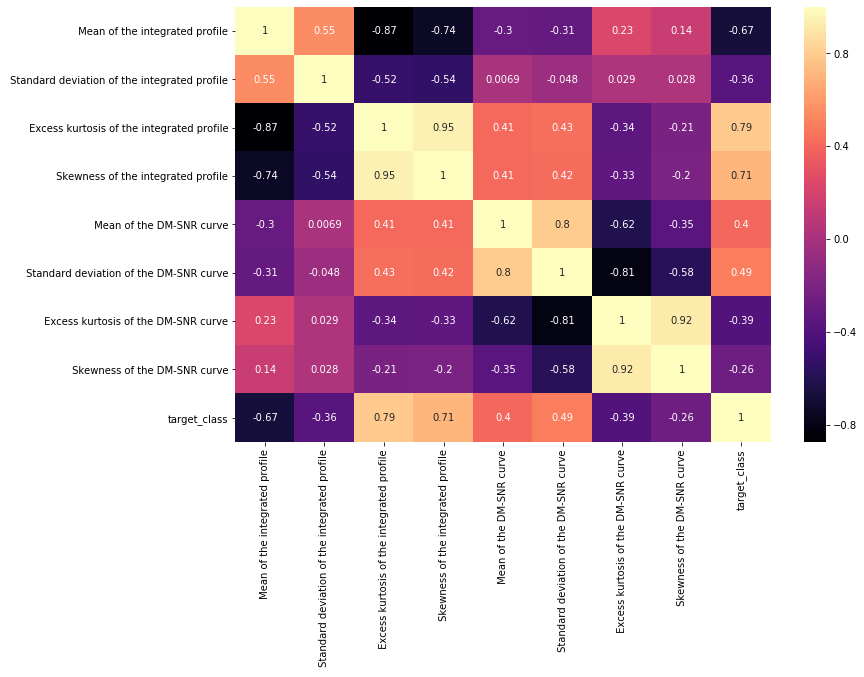

In [8]:
plt.figure(figsize = (12, 8))
sns.heatmap(stars.corr(), cmap='magma', annot=True)

From the hitmap and pairplot we see strong correlation for target class.

*Positive:*
- Excess kurtosis of the integrated profile
- Skewness of the integrated profile

*Negative:*
- Mean of the integrated profile

### Split train and test data

In [11]:
from sklearn.model_selection import train_test_split

X = stars.drop('target_class',axis=1)
y = stars['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Support Vector Machine Classifier

Call the SVC() model from sklearn and fit the model to the training data.

In [37]:
#connect classification report,confusion_matrix libraries in advance
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
from sklearn.svm import SVC

In [15]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

predictions_svm = svc_model.predict(X_test)

N:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
print(confusion_matrix(y_test,predictions_svm))
print(classification_report(y_test,predictions_svm))

[[5347    0]
 [ 552    8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5347
           1       1.00      0.01      0.03       560

    accuracy                           0.91      5907
   macro avg       0.95      0.51      0.49      5907
weighted avg       0.92      0.91      0.86      5907



### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

predictions_rfc = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,predictions_rfc))
print(classification_report(y_test,predictions_rfc))

[[5313   34]
 [ 102  458]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5347
           1       0.93      0.82      0.87       560

    accuracy                           0.98      5907
   macro avg       0.96      0.91      0.93      5907
weighted avg       0.98      0.98      0.98      5907



### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions_log = logmodel.predict(X_test)

N:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
print(confusion_matrix(y_test,predictions_log))
print(classification_report(y_test,predictions_log))

[[5319   28]
 [ 107  453]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5347
           1       0.94      0.81      0.87       560

    accuracy                           0.98      5907
   macro avg       0.96      0.90      0.93      5907
weighted avg       0.98      0.98      0.98      5907



### K Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

Choose the best number of neibors:

In [32]:
error_rate = []

# Will take some time
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

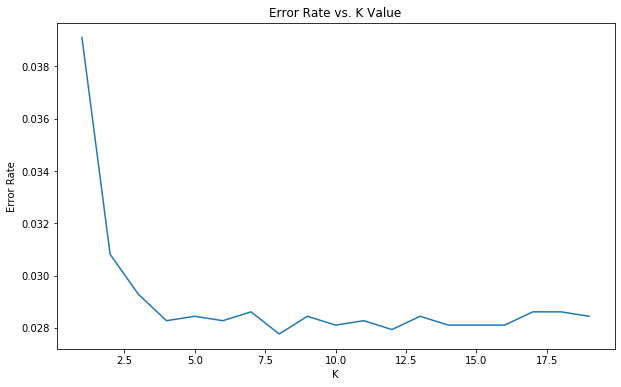

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

prediction_knn = knn.predict(X_test)

In [36]:
print(confusion_matrix(y_test,prediction_knn))
print(classification_report(y_test,prediction_knn))

[[5319   28]
 [ 138  422]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5347
           1       0.94      0.75      0.84       560

    accuracy                           0.97      5907
   macro avg       0.96      0.87      0.91      5907
weighted avg       0.97      0.97      0.97      5907

